# Exploring different options for plotting text in Magics

This notebook will help you discover lots of posibilities for customizing title and text on your maps in Magics.

**Mtext** controls how text on our maps. Here we can set things like text style, size, colour and many more things.  
List of all **mtext** parameters you can find [here](https://confluence.ecmwf.int/display/MAGP/Text+plotting "Text parameters")


### Install Magics
If you don't have Magics installed, run the next cell to install Magics using conda.

In [ ]:
# Install Magics in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} Magics

### Import Magics and define non Text paramters

For start let's import Magics and define some **none text** parameters. We will try not to change these much in the rest of the notebook.

In [1]:
import Magics.macro as magics
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"  # this command enables us to plot more images at once

projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name    = "europe",
    page_id_line             = "off"
)

coast = magics.mcoast()

ecmwf_cont = magics.mcont(
    contour_automatic_setting = "ecmwf",
    legend                    = "on")

cont_anomaly = magics.mcont(
    contour                      = "off",
    legend                       = "on",
    contour_shade                = "on",
    contour_level_selection_type = "level_list",
    contour_level_list           = [-15.00, -10.00, -6.00, -3.00, -1.00, 
                                    0.00, 1.00, 3.00, 6.00, 10.00, 15.00],
    contour_label                = "on",
    contour_label_height         = 0.40,
    contour_label_colour         = "charcoal",
    contour_label_frequency      = 1,
    contour_shade_method         = "area_fill",
    contour_shade_colour_method  = "list",
    contour_shade_colour_list    = ['#001133','#003399','#0055ff','#6699ff',
                                    '#ccddff','#ffcccc','#ff6666','#ff0000',
                                    '#990000','#330000'])

legend = magics.mlegend(legend_display_type = "continuous")

# Different meteorological parameters we will plot in this notebook
temperature   = magics.mgrib(grib_input_file_name = "../../data/t850.grib")
geopotential  = magics.mgrib(grib_input_file_name = "../../data/z500.grib")

ta = magics.mnetcdf(
    netcdf_filename               = '../../data/title.nc',
    netcdf_time_dimension_setting = "1944-01-16 00:00:00",
    netcdf_value_variable         = 'tempanomaly'
              )

### Default title

As with everything in Magics, default title is something you can start with.

Magics can inspect GRIB metadata and display name of parameter, start, step and valid time in the title.  
If NetCDF file has title, Magics will find it and display it.

Magics-warning: Grib API: can not find key [typeOfGeneratingProcess]  - Key/value not found

Magics-warning: Grib API: can not find key [typeOfGeneratingProcess]  - Key/value not found



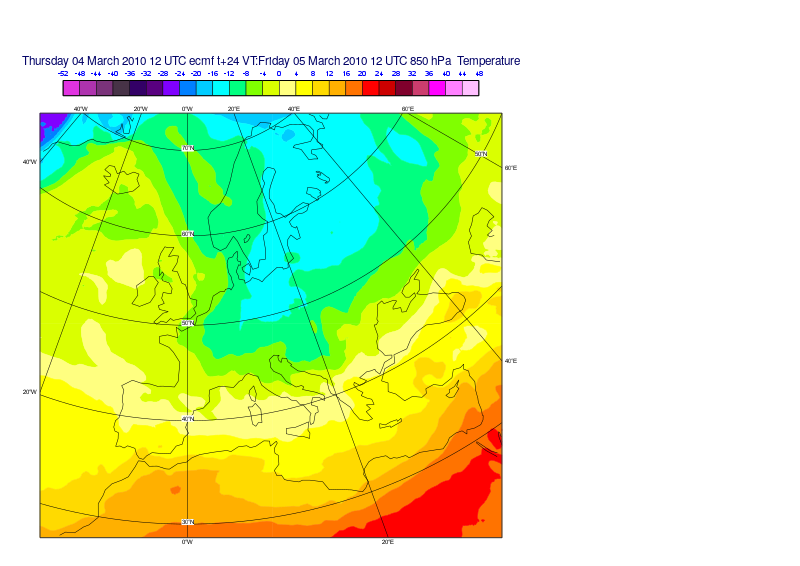

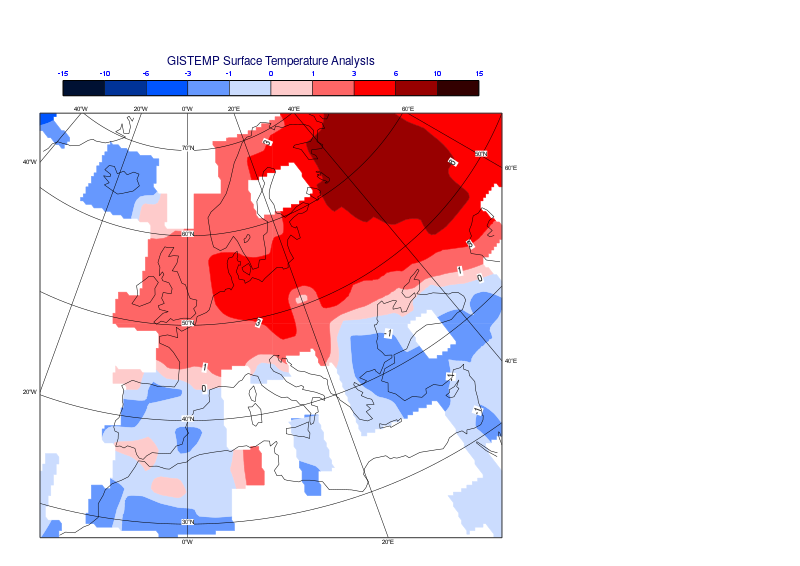

In [2]:
title = magics.mtext()

magics.plot(projection, temperature, ecmwf_cont, coast, legend, title) # GRIB
magics.plot(projection, ta, cont_anomaly, coast, legend, title)        # NetCDF

### Positional title

Magics-warning: Grib API: can not find key [typeOfGeneratingProcess]  - Key/value not found

Magics-warning: Grib API: can not find key [typeOfGeneratingProcess]  - Key/value not found



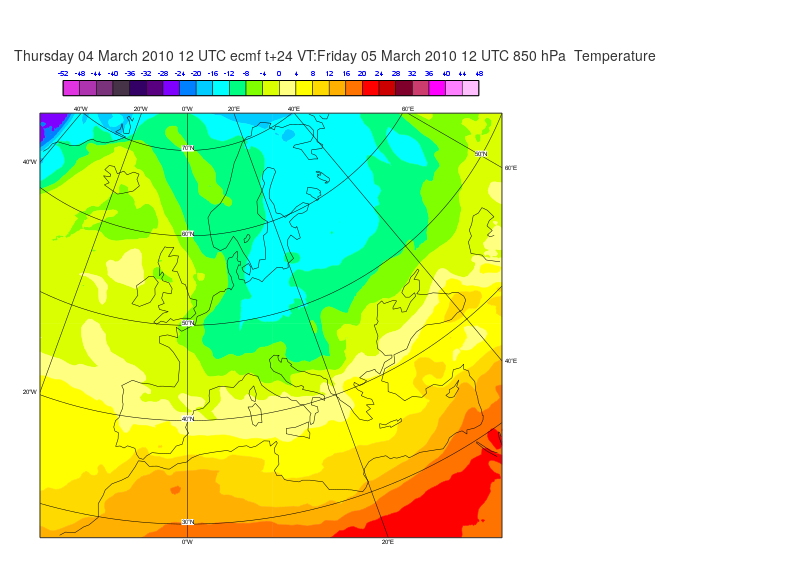

In [3]:
title = magics.mtext(    
    text_lines          = ['<magics_title/>'],
    text_justification  = 'center',
    text_font_size      = 0.6,
    text_mode           = "positional",
    text_box_x_position = 5.00,
    text_box_y_position = 18.50,
    text_colour         = 'charcoal')  
    
magics.plot(projection, temperature, ecmwf_cont, coast, legend, title)

### Using basic html in title


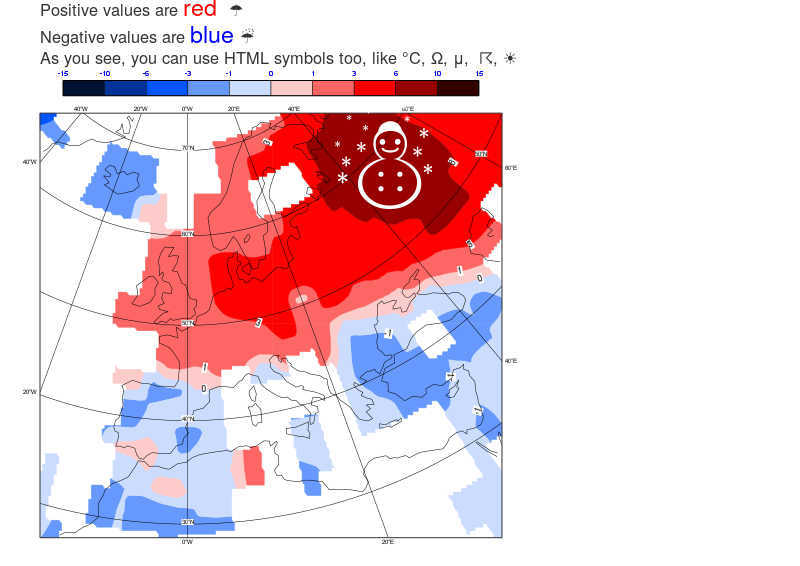

In [4]:
title = magics.mtext(
    text_lines = ["Positive values are <font colour='red'  size='1'>red  </font>  &#9730;",
                  "Negative values are <font colour='blue' size='1'>blue </font>   &#9748;",
                  "As you see, you can use HTML symbols too, like &#176;C, &#937;, &#956;,  &#9736;, &#9728;"
                 ],
    text_justification = "left",
    text_font_size     = 0.7,
    text_colour        = "charcoal")
    
snowman = magics.mtext(
    text_lines          = ["&#9731;"],
    text_mode           = "positional",
    text_box_x_position = 12.,
    text_box_y_position = 12.,
    text_box_x_length   = 10,
    text_box_y_length   = 10,    
    text_justification  = "left",
    text_font_size      = 5.7,
    text_colour         = "white") 

magics.plot(projection, ta, cont_anomaly, coast, legend, title,snowman)

### Using grib key information in text with white background

For situations when we want text inside a map we need to set **text_box_blanking** parameter to **"on"** to get a white background.  

We can use grib keys such as **name, shortName, step, level, base-date, valid-date** to display information about the data.

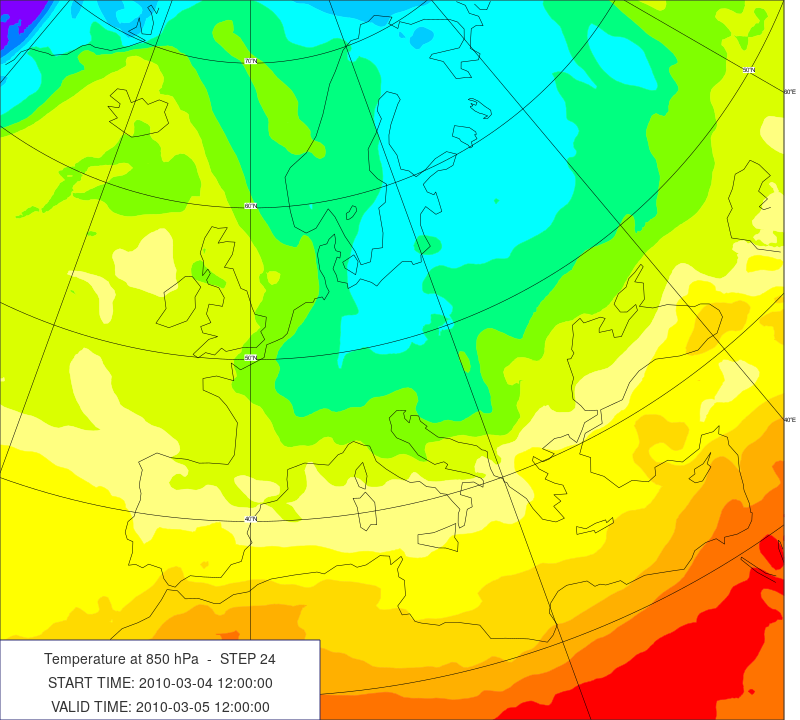

In [5]:
title = magics.mtext(    
    text_lines          = ["<grib_info key='name'/> at <grib_info key='level'/> hPa  -  STEP <grib_info key='step'/>",
                           "START TIME: <grib_info key='base-date' format='%Y-%m-%d %H:%M:00'/>", 
                           "VALID TIME: <grib_info key='valid-date' format='%Y-%m-%d %H:%M:00'/>"],
    text_justification  = 'center',
    text_font_size      = 0.6,
    text_mode           = "positional",
    text_box_x_position = 0.,
    text_box_y_position = 0.,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_box_blanking   = "on",
    text_border         = "on",
    text_border_colour  = "rgb(0.11,0.11,0.41)",
    text_colour         = 'charcoal') 

full_screen = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name    = "europe",
    subpage_x_position       = 0.,
    subpage_y_position       = 0.,
    subpage_x_length         = 20.,
    subpage_y_length         = 18.,
    page_x_position          = 0.,
    page_y_position          = 0.,
    page_x_length            = 20.,
    page_y_length            = 18.,
    super_page_x_length      = 20.,
    super_page_y_length      = 18., 
    page_id_line             = 'off'
)

magics.plot(full_screen, temperature, ecmwf_cont, coast, legend, title)

### Handling title when plotting more than one grib field

Most of the time we are not plotting only one meteorological parameter, but we make a combination of 2 or more. In this case Magics will plot each line of text as many times as there are parameters. You can see that in first of next two images.  

The way to control this is using **where=** for filtering.

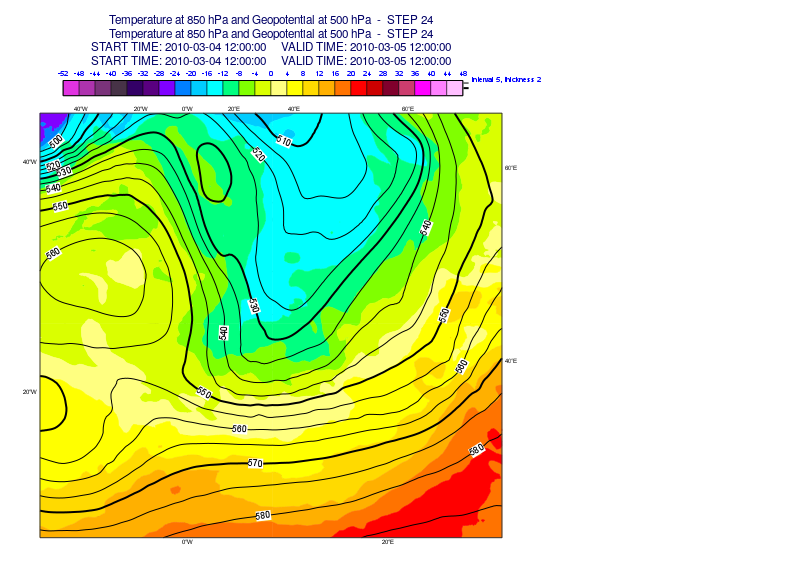

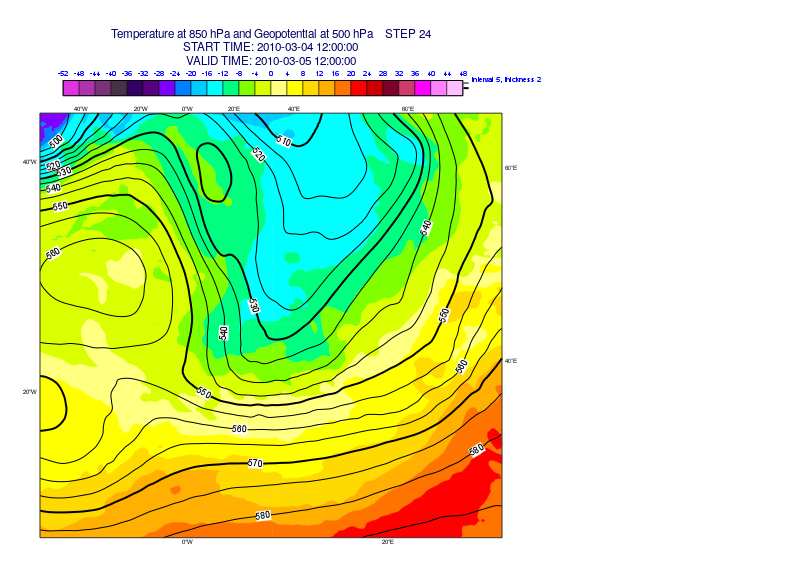

In [6]:
default_title = magics.mtext(
    text_lines          = ["Temperature at 850 hPa and Geopotential at 500 hPa  -  STEP <grib_info key='step'/>",
                           "START TIME: <grib_info key='base-date' format='%Y-%m-%d %H:%M:00'/>     VALID TIME: <grib_info key='valid-date' format='%Y-%m-%d %H:%M:00'/>"])

filtered_title = magics.mtext(
    text_lines          = ["Temperature at 850 hPa and Geopotential at 500 hPa    STEP <grib_info key='step' where='shortName=z'/>",
                           "START TIME: <grib_info key='base-date' format='%Y-%m-%d %H:%M:00'  where='shortName=z'/>", 
                           "VALID TIME: <grib_info key='valid-date' format='%Y-%m-%d %H:%M:00' where='shortName=z'/>"])
  
magics.plot(projection, coast, temperature, ecmwf_cont, geopotential, ecmwf_cont, legend, default_title)  
magics.plot(projection, coast, temperature, ecmwf_cont, geopotential, ecmwf_cont, legend, filtered_title) 